In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import tsgm
from tensorflow.keras.optimizers import Adam




In [38]:
df = pd.read_csv("TestDataCompiled.csv")
df.columns = ['AmplitudePrimary', 'AmplitudeSecondary', 'Latency', "CorrectiveSaccade", "Normal"]
display(df)


,AmplitudePrimary,AmplitudeSecondary,Latency,CorrectiveSaccade,Normal
0,7.905335,0.907229,0.124998,7,0
1,17.381435,0.563108,0.341670,13,0
2,29.415535,1.097195,0.308346,16,0
3,10.173487,1.182019,0.175026,9,0
4,6.801426,7.733378,0.391700,28,0
...,...,...,...,...,...
187,3.948713,3.948713,0.033335,16,1
188,14.329194,3.160185,0.125025,6,1
189,19.042962,3.035957,0.525034,5,1
190,1.762336,2.942543,0.325038,15,1


# No Data Augmentation

In [39]:
y = df.Normal
X = df.drop('Normal', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

### Logsitic Regression

In [10]:
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.717948717948718
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        28
           1       0.50      0.09      0.15        11

    accuracy                           0.72        39
   macro avg       0.61      0.53      0.49        39
weighted avg       0.66      0.72      0.64        39



### Random Forest

In [16]:
model = RandomForestClassifier(random_state=42, max_depth = None, n_estimators = 300, min_samples_leaf = 4, min_samples_split = 10)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7692307692307693
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        28
           1       0.67      0.36      0.47        11

    accuracy                           0.77        39
   macro avg       0.73      0.65      0.66        39
weighted avg       0.75      0.77      0.74        39



In [14]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.7053763440860215


### SVM 

In [19]:
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001]   # Kernel coefficient for 'rbf' and 'poly' kernels
#     'kernel': ['rbf', 'poly', 'linear']  # Kernel type
}

# Initialize the SVM model
svm = SVC(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'C': 0.1, 'gamma': 1}
Best Score: 0.7124731182795699


In [20]:
model = SVC(kernel='rbf', random_state=42, C = 0.1, gamma = 1)  # You can choose different kernels such as 'linear', 'poly', 'rbf', etc.

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.717948717948718
Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        28
           1       0.00      0.00      0.00        11

    accuracy                           0.72        39
   macro avg       0.36      0.50      0.42        39
weighted avg       0.52      0.72      0.60        39



/Users/sanmatichoudhary/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sanmatichoudhary/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sanmatichoudhary/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### simple neural network

In [96]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=4, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/50
31/31 [==============================] - 1s 5ms/step - loss: 1.4888 - accuracy: 0.5820 - val_loss: 0.8936 - val_accuracy: 0.7097
Epoch 2/50
31/31 [==============================] - 0s 2ms/step - loss: 0.5663 - accuracy: 0.7295 - val_loss: 0.5963 - val_accuracy: 0.7742
Epoch 3/50
31/31 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.7049 - val_loss: 0.6013 - val_accuracy: 0.7419
Epoch 4/50
31/31 [==============================] - 0s 2ms/step - loss: 0.5570 - accuracy: 0.7295 - val_loss: 0.5773 - val_accuracy: 0.7097
Epoch 5/50
31/31 [==============================] - 0s 2ms/step - loss: 0.5492 - accuracy: 0.7377 - val_loss: 0.5926 - val_accuracy: 0.7097
Epoch 6/50
31/31 [==============================] - 0s 2ms/step - loss: 0.5608 - accuracy: 0.7295 - val_loss: 0.5878 - val_accuracy: 0.7097
Epoch 7/50
31/31 [==============================] - 0s 2ms/step - loss: 0.5562 - accuracy: 0.7377 - val_loss: 0.5849 - val_accuracy: 0.7097
Epoch 8/50
31/31 [==

# Data Augmentation: Gaussain Noise 

In [98]:
def add_gaussian_noise(X, mean=0, std=0.1):
    noise = np.random.normal(mean, std, size=X.shape)
    return X + noise
# Example: Adding Gaussian noise with mean=0 and std=0.1
X_with_gaussian_noise = add_gaussian_noise(X)
X_augmented = pd.concat([X, X_with_gaussian_noise])
y_augmented = pd.concat([y,y])
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42, stratify = y_augmented)




### Logisitic Reg

In [65]:
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7402597402597403
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        55
           1       0.62      0.23      0.33        22

    accuracy                           0.74        77
   macro avg       0.69      0.59      0.59        77
weighted avg       0.72      0.74      0.69        77



### RF

In [66]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.8013749338974089


In [67]:
model = RandomForestClassifier(random_state=42, max_depth = 10, n_estimators = 300, min_samples_leaf = 1, min_samples_split = 2)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.91        55
           1       0.87      0.59      0.70        22

    accuracy                           0.86        77
   macro avg       0.86      0.78      0.80        77
weighted avg       0.86      0.86      0.85        77



### SVM 

In [68]:
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001]   # Kernel coefficient for 'rbf' and 'poly' kernels
#     'kernel': ['rbf', 'poly', 'linear']  # Kernel type
}

# Initialize the SVM model
svm = SVC(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 10, 'gamma': 1}
Best Score: 0.889264939185616


In [69]:
model = SVC(kernel='rbf', random_state=42, C = 10, gamma = 1)  # You can choose different kernels such as 'linear', 'poly', 'rbf', etc.

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.922077922077922
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        55
           1       0.90      0.82      0.86        22

    accuracy                           0.92        77
   macro avg       0.91      0.89      0.90        77
weighted avg       0.92      0.92      0.92        77



### simple neural network

In [99]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=4, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/50
62/62 [==============================] - 1s 3ms/step - loss: 0.7556 - accuracy: 0.6571 - val_loss: 0.5756 - val_accuracy: 0.6129
Epoch 2/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5853 - accuracy: 0.6816 - val_loss: 0.5203 - val_accuracy: 0.7581
Epoch 3/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.7143 - val_loss: 0.5317 - val_accuracy: 0.7903
Epoch 4/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5873 - accuracy: 0.7224 - val_loss: 0.5279 - val_accuracy: 0.8065
Epoch 5/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.7347 - val_loss: 0.5238 - val_accuracy: 0.8065
Epoch 6/50
62/62 [==============================] - 0s 1ms/step - loss: 0.5674 - accuracy: 0.7306 - val_loss: 0.5691 - val_accuracy: 0.7097
Epoch 7/50
62/62 [==============================] - 0s 1ms/step - loss: 0.5667 - accuracy: 0.7184 - val_loss: 0.5333 - val_accuracy: 0.8065
Epoch 8/50
62/62 [==

# Data Augmentation: Jittering

In [100]:
def add_jittering(X, magnitude=0.1):
    jitter = np.random.uniform(-magnitude, magnitude, size=X.shape)
    return X + jitter

# Example: Adding jittering with magnitude=0.1
X_with_jittering = add_jittering(X)

X_augmented = pd.concat([X, X_with_jittering])
y_augmented = pd.concat([y,y])
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42, stratify = y_augmented)



### Logisitic Reg

In [71]:
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7402597402597403
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        55
           1       0.62      0.23      0.33        22

    accuracy                           0.74        77
   macro avg       0.69      0.59      0.59        77
weighted avg       0.72      0.74      0.69        77



### RF

In [72]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8079851930195664


In [73]:
model = RandomForestClassifier(random_state=42, max_depth = 10, n_estimators = 100, min_samples_leaf = 1, min_samples_split = 2)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.91        55
           1       0.87      0.59      0.70        22

    accuracy                           0.86        77
   macro avg       0.86      0.78      0.80        77
weighted avg       0.86      0.86      0.85        77



### SVM

In [74]:
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001]   # Kernel coefficient for 'rbf' and 'poly' kernels
#     'kernel': ['rbf', 'poly', 'linear']  # Kernel type
}

# Initialize the SVM model
svm = SVC(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 10, 'gamma': 1}
Best Score: 0.889264939185616


In [75]:
model = SVC(kernel='rbf', random_state=42, C = 10, gamma = 1)  # You can choose different kernels such as 'linear', 'poly', 'rbf', etc.

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.922077922077922
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        55
           1       0.90      0.82      0.86        22

    accuracy                           0.92        77
   macro avg       0.91      0.89      0.90        77
weighted avg       0.92      0.92      0.92        77



### simple neural network 

In [101]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=4, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/50
62/62 [==============================] - 1s 3ms/step - loss: 0.6285 - accuracy: 0.6857 - val_loss: 0.5222 - val_accuracy: 0.7581
Epoch 2/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5712 - accuracy: 0.7184 - val_loss: 0.5025 - val_accuracy: 0.7581
Epoch 3/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5831 - accuracy: 0.7020 - val_loss: 0.5637 - val_accuracy: 0.7581
Epoch 4/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5565 - accuracy: 0.7429 - val_loss: 0.5849 - val_accuracy: 0.7419
Epoch 5/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5626 - accuracy: 0.7184 - val_loss: 0.5087 - val_accuracy: 0.7742
Epoch 6/50
62/62 [==============================] - 0s 4ms/step - loss: 0.5476 - accuracy: 0.7184 - val_loss: 0.5380 - val_accuracy: 0.7742
Epoch 7/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.7429 - val_loss: 0.5218 - val_accuracy: 0.7581
Epoch 8/50
62/62 [==

# Data Augmentation: GAN

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

# Generator network
def build_generator(latent_dim, num_features):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=latent_dim),
        layers.BatchNormalization(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(num_features, activation='sigmoid')
    ])
    return model

# Updated discriminator network with additional layers and dropout
def build_discriminator(num_features):
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_dim=num_features),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = keras.Sequential([generator, discriminator])
    return model

# Training GAN
def train_gan(generator, discriminator, gan, X_train, y_train, latent_dim, num_epochs=100, batch_size=4, logging_interval=1000):
    for epoch in range(num_epochs):
        # Generate fake samples
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generated_data = generator.predict(noise)
        
        # Select a random batch of real samples
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_samples = X_train.iloc[idx]
        
        # Concatenate real and fake samples
        X = np.concatenate([real_samples, generated_data])
        
        # Labels for real and fake samples
        y_real = np.ones((batch_size, 1))
        y_fake = np.zeros((batch_size, 1))
        y = np.concatenate([y_real, y_fake])
        
        # Train discriminator
        discriminator_loss = discriminator.train_on_batch(X, y)
        
        # Train generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generator_loss = gan.train_on_batch(noise, y_real)
        
        # Logging
#         if epoch % logging_interval == 0:
        print(f"Epoch: {epoch}, Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}")

# Generate synthetic samples
def generate_samples(generator, latent_dim, num_samples):
    noise = np.random.normal(0, 1, (num_samples, latent_dim))
    generated_data = generator.predict(noise)
    return generated_data

# Load data
# Assuming your DataFrame is named df, and the target column is named 'abnormal'
# Drop the target column to get the feature data
# X = df.drop(columns=['normal']).values
# y = df['normal'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameters
latent_dim = 100
num_features = X_train.shape[1]

# Build and compile models
generator = build_generator(latent_dim, num_features)
discriminator = build_discriminator(num_features)
gan = build_gan(generator, discriminator)
optimizer = Adam(learning_rate=0.0001)
discriminator.compile(optimizer=optimizer, loss='binary_crossentropy')
# discriminator.compile(optimizer='adam', loss='binary_crossentropy')
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Train GAN
train_gan(generator, discriminator, gan, X_train, y_train, latent_dim)

# Generate samples
generated_samples = generate_samples(generator, latent_dim, 1000)

# Plot generated samples
# plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], color='blue', alpha=0.5, label='Real Data')
# plt.scatter(generated_samples[:, 0], generated_samples[:, 1], color='red', alpha=0.5, label='Generated Data')
# plt.legend()
# plt.show()

display(generated_samples)


1/1 [==============================] - 0s 64ms/step
Epoch: 0, Discriminator Loss: 0.7228303551673889, Generator Loss: 0.7351122498512268
1/1 [==============================] - 0s 16ms/step
Epoch: 1, Discriminator Loss: 1.0624488592147827, Generator Loss: 0.7233213186264038
1/1 [==============================] - 0s 15ms/step
Epoch: 2, Discriminator Loss: 1.9973974227905273, Generator Loss: 0.7383577823638916
1/1 [==============================] - 0s 16ms/step
Epoch: 3, Discriminator Loss: 1.1451380252838135, Generator Loss: 0.6589908003807068
1/1 [==============================] - 0s 17ms/step
Epoch: 4, Discriminator Loss: 1.6089630126953125, Generator Loss: 0.6887204647064209
1/1 [==============================] - 0s 18ms/step
Epoch: 5, Discriminator Loss: 1.3649269342422485, Generator Loss: 0.6910362243652344
1/1 [==============================] - 0s 18ms/step
Epoch: 6, Discriminator Loss: 1.1417568922042847, Generator Loss: 0.7382432222366333
1/1 [==============================] - 0s

1/1 [==============================] - 0s 17ms/step
Epoch: 60, Discriminator Loss: 0.8029500842094421, Generator Loss: 0.7505884170532227
1/1 [==============================] - 0s 17ms/step
Epoch: 61, Discriminator Loss: 1.2901699542999268, Generator Loss: 0.7014097571372986
1/1 [==============================] - 0s 16ms/step
Epoch: 62, Discriminator Loss: 1.5939209461212158, Generator Loss: 0.6785833835601807
1/1 [==============================] - 0s 16ms/step
Epoch: 63, Discriminator Loss: 0.8600170612335205, Generator Loss: 0.7481177449226379
1/1 [==============================] - 0s 16ms/step
Epoch: 64, Discriminator Loss: 0.6407102942466736, Generator Loss: 0.7048909664154053
1/1 [==============================] - 0s 16ms/step
Epoch: 65, Discriminator Loss: 1.0071110725402832, Generator Loss: 0.6994690895080566
1/1 [==============================] - 0s 17ms/step
Epoch: 66, Discriminator Loss: 0.7979354858398438, Generator Loss: 0.7062640190124512
1/1 [=============================

array([[0.5945975 , 0.69924504, 0.68782675, 0.47292876],
       [0.5098404 , 0.791132  , 0.8448489 , 0.24682622],
       [0.7744844 , 0.79168385, 0.28674114, 0.4047448 ],
       ...,
       [0.33966556, 0.837537  , 0.5905928 , 0.77881265],
       [0.69391423, 0.52821773, 0.10553468, 0.14630388],
       [0.60785675, 0.10906217, 0.31993917, 0.18274663]], dtype=float32)

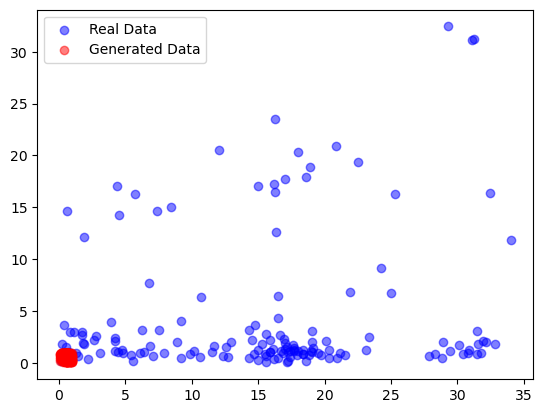

In [92]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], color='blue', alpha=0.5, label='Real Data')
plt.scatter(generated_samples[:, 0], generated_samples[:, 1], color='red', alpha=0.5, label='Generated Data')
plt.legend()
plt.show()